参考代码：https://aistudio.baidu.com/aistudio/projectdetail/1938000

# 常规赛：PALM眼底彩照视盘探测与分割基线方案

**赛题简述**
	
    PALM眼底视盘检测与分割常规赛的重点是研究和发展与患者眼底照片结构分割相关的算法。该常规赛的目标是评估和比较在一个常见的视网膜眼底图像数据集上分割视盘的自动算法。该任务目的是对眼底图像的视盘进行检测，若存在视盘结构，需从眼底图像中分割出视盘区域；若无视盘结构，分割结果直接置全背景。

![](https://ai-studio-static-online.cdn.bcebos.com/938ab4fac88e44969e61f8f10181ca1366c53fbc3d6147ff80487b03c964543e)


**数据基本标签**

	标签为 0 代表视盘（黑色区域）；标签为 255 代表其他（白色区域）。
    

**训练数据集**

文件名称：Train

Train文件夹里有fundus_images文件夹和Disc_Masks文件夹。

* fundus_images文件夹内包含800张眼底彩照，分辨率为1444×1444，或2124×2056。命名形如H0001.jpg、N0001.jpg、P0001.jpg和V0001.jpg。

* Disc_Masks文件夹内包含fundus_images里眼底彩照的视盘分割金标准，大小与对应的眼底彩照一致。命名前缀和对应的fundus_images文件夹里的图像命名一致，后缀为bmp。

**测试数据集**

文件名称：PALM-Testing400-Images

* 包含400张眼底彩照，命名形如T0001.jpg。

# 一、基线方案内容

* 解压数据与数据划分

	-- # 解压数据集
    
	-- !unzip -oq /home/aistudio/data/data85136/常规赛：PALM眼底彩照视盘探测与分割.zip -d PaddleSeg/data
    
   -- # 划分数据
   
	-- !python utils/dataset_splited.py

* 数据标签预处理

   -- # 转换标签
   
   -- !python utils/dataset_pretrans.py

	* 原分类为1分类问题，为了问题研究的充分性和更大程度上利用多分类间的类别竞争对分类结构有一个更好的指导
   
   * 二分类问题描述，原标签为0不变，将255无效值转换为1值
   
   * 后期提交前会后处理，消去1值，换回赛题需要的255值
   
* 利用PaddleSeg套件加速赛题开发与测试: 可参考套件config中的yml，结合动态图API进行快速高效的实验开发

* 实现训练流程

* 实现预测流程

* 完成提交结果 -- 基线方案为0.92431的得分(iters:2400)，可从**训练迭代次数**、**损失函数**、**模型**入手
	
   -- # 提交结果后处理
   
	-- utils/post_process.py

**部分训练参数**

![](https://ai-studio-static-online.cdn.bcebos.com/19c1febc87ec4fd78bb5b4a1966389c0979588525df44379885e5543c41d363c)

![](https://ai-studio-static-online.cdn.bcebos.com/d8ff821a46ab43df8e13fda1d2e5752bd4a54eeb3ae643dbad0288ff41f0c6cd)


In [ ]:
# 解压PaddleSeg压缩包
!unzip -oq data/data88946/PaddleSeg.zip -d /home/aistudio/
# 修改文件名
!mv PaddleSeg-release-v2.0 PaddleSeg

上一步mv，可以将PaddleSeg加压后的文件目录改成PaddleSeg

> PaddleSeg下载至github的release2.0版本，为了方便大家使用，已添加在了数据集中供大家使用

In [ ]:
# 解压数据集到PaddleSeg目录下的data文件夹
!unzip -oq /home/aistudio/data/data85136/常规赛：PALM眼底彩照视盘探测与分割.zip -d PaddleSeg/data

In [ ]:
# 查看数据集文件的树形结构
!tree -d PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割

PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割
├── PALM-Testing400-Images
└── Train
    ├── Disc_Masks
    └── fundus_image

4 directories


# 二、比赛数据集情况
PALM-Testing400-Images : 测试数据集文件夹

Train : 训练数据集文件夹

* Disc_Masks   ; 标注图片
* fundus_image  : 原始图片

> 注意没有验证数据集，这里提供一个简单的划分程序，划分比例为0.7

通过PIL的Image读取图片查看以下原数据与Label标注情况

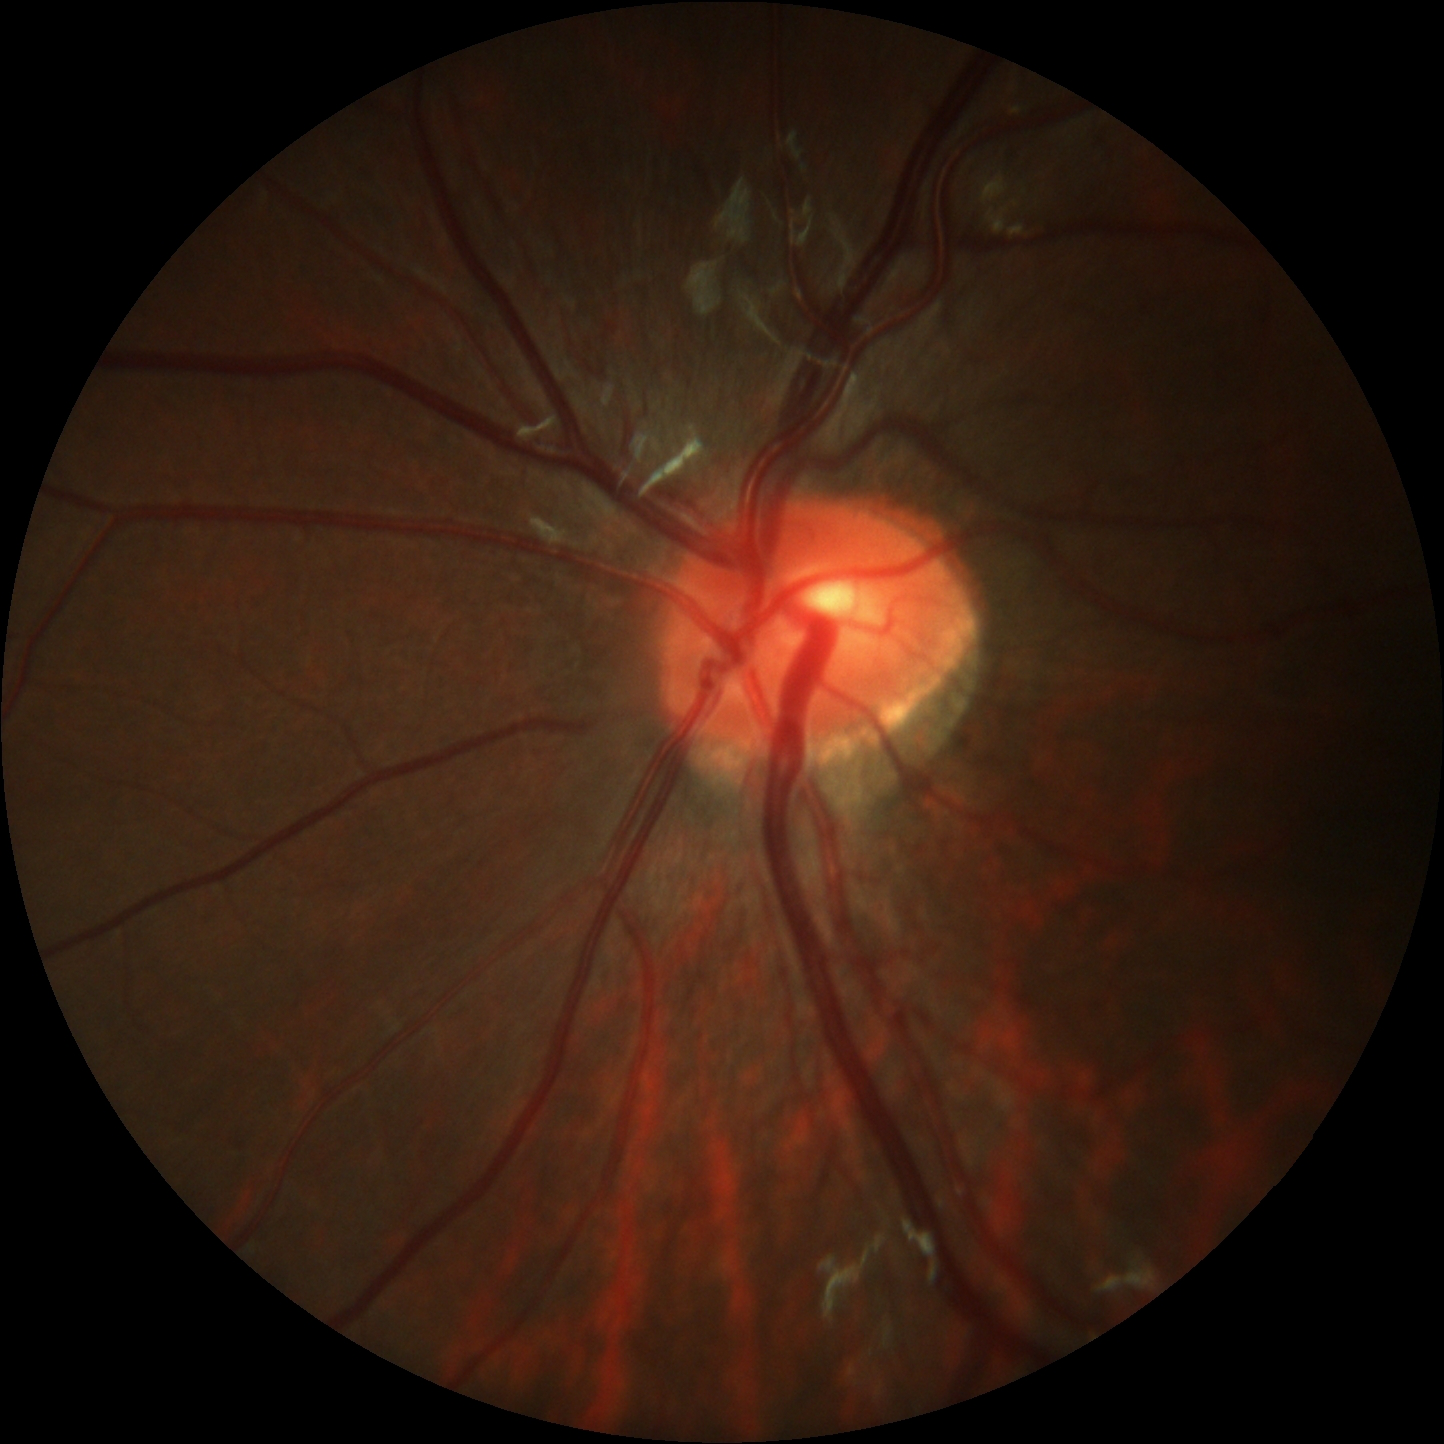

In [ ]:
from PIL import Image

# 读取图片
png_img = Image.open('PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割/Train/fundus_image/H0003.jpg')
png_img  # 展示图片

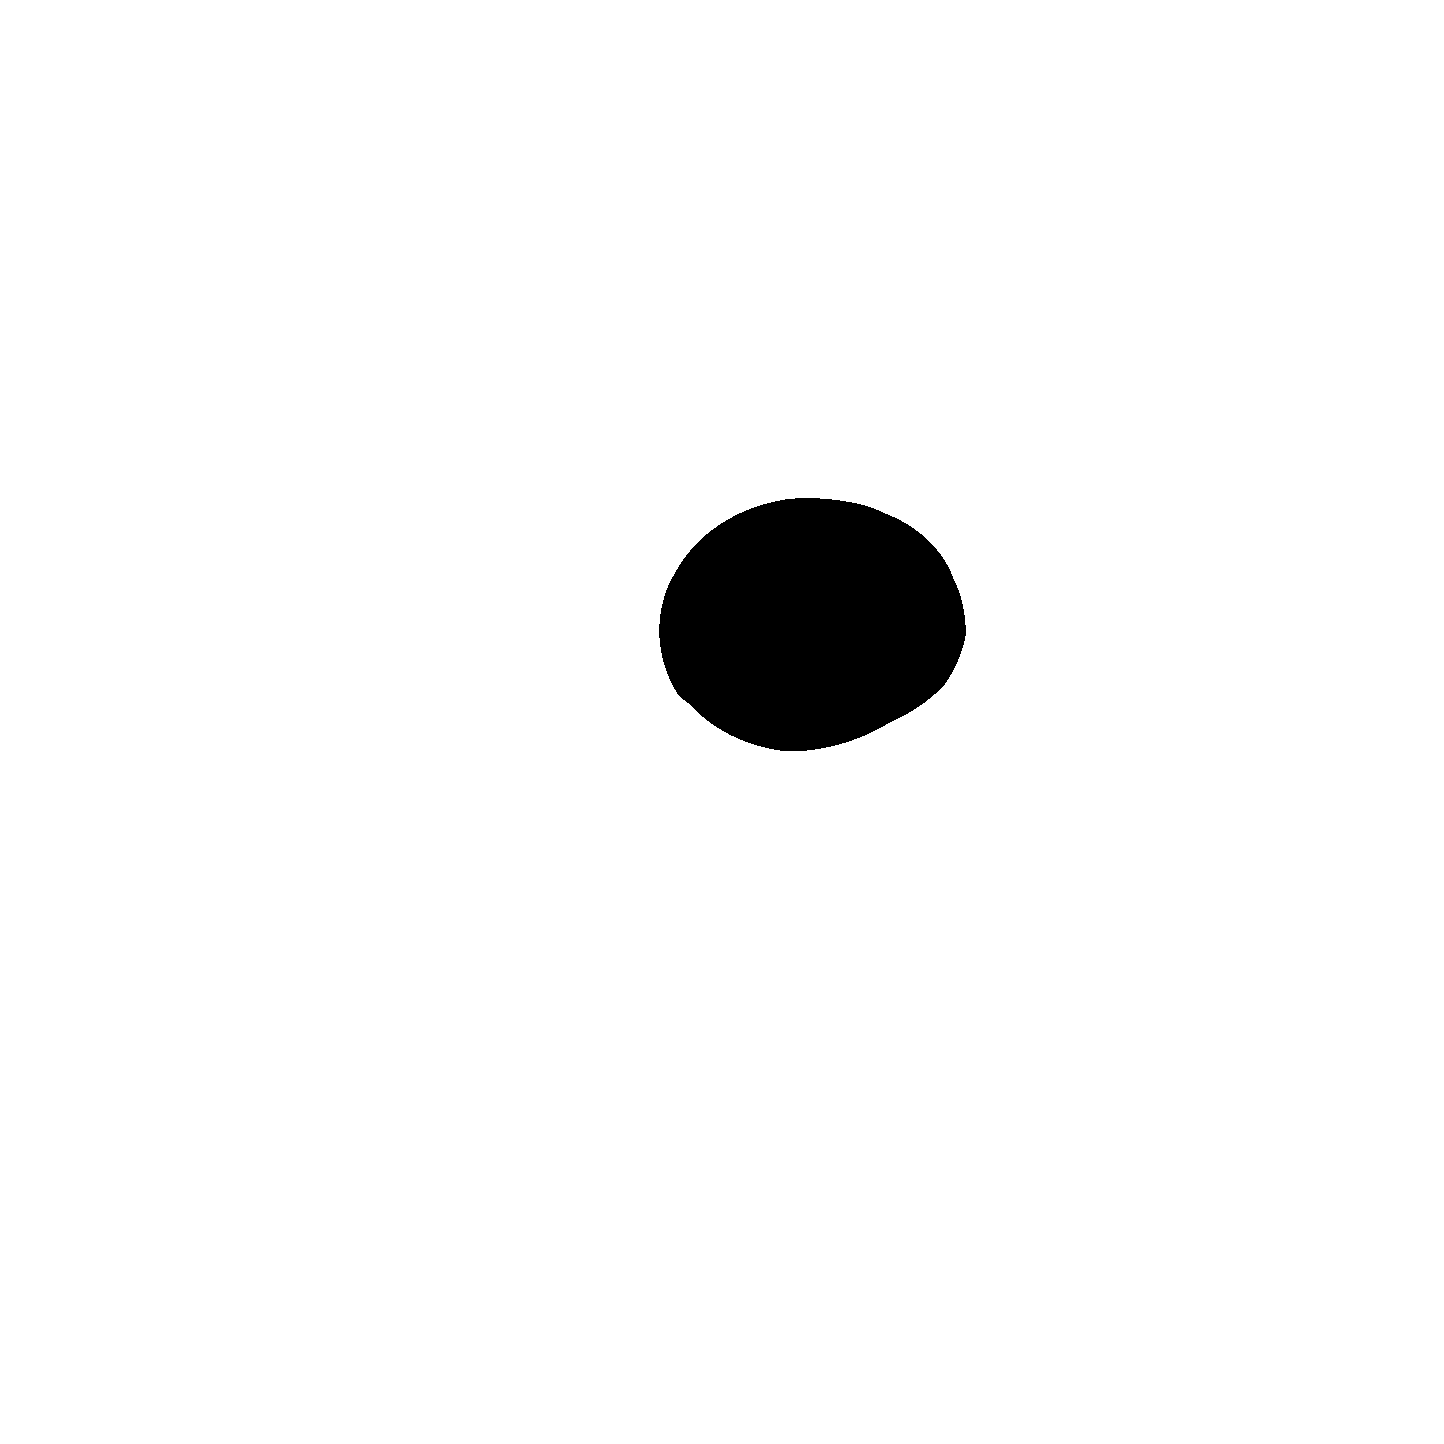

In [ ]:
bmp_img = Image.open('PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割/Train/Disc_Masks/H0003.bmp')
bmp_img   # 展示图片

可以看出，白色部分全是255，黑色为有效标注区域(0值)

# 三、划分数据集与数据预处置


当前划分比例为0.7——可在`utils`文件夹下的`dataset_splited.py`修改`train_percent`为其它值

数据预处置-可在`utils`文件夹下的`dataset_pretrans.py`中查看相关代码

In [ ]:
# 保证路径为初始路径
%cd /home/aistudio

# 划分数据
!python utils/dataset_splited.py

# 转换标签--预处置
!python utils/dataset_pretrans.py

/home/aistudio
————开始数据清洗划分————
The Split Params: train_percent=0.70
Image Dir Has Ready!
Label Dir Has Ready!
Processing Test Split: 100%|█████████████████| 400/400 [00:00<00:00, 479.92it/s]
完成数据集划分：
- 数据根目录: PaddleSeg/data
	 - 子目录: Image: 存放真实图片
		 - to_train: 训练用 , lens:560
		 - to_val: 验证用 , lens:240
		 - to_test: 测试用(提交预测) , lens:400
	 - 子目录: Label: 存放标注图片
		 - to_train: 训练用 , lens:560
		 - to_val: 验证用 , lens:240
		 - to_test: 测试用(保存提交预测) , lens:0
————开始数据预处理转换————
转换说明:
	 1. 默认标签为255与0，为了训练方便，将255转换为1，变成2分类问题
	 2. 新标签0与1，预测结束进行后处理即可得到赛题需要的结果
100%|█████████████████████████████████████████| 800/800 [00:12<00:00, 65.18it/s]


移除原数据，减小项目空间，减少下一次进入和退出保存时花的时间

In [ ]:
# 移除’常规赛：PALM眼底彩照视盘探测与分割‘文件夹
!rm -rf PaddleSeg/data/常规赛：PALM眼底彩照视盘探测与分割
!rm -rf PaddleSeg/data/__MACOSX

# 四、下载依赖项

> 平台可以不用下载，但是如果在本地可能需要执行这一步

In [ ]:
# 下载依赖项，保证PaddleSeg正常运行
%cd PaddleSeg
%pwd
!pip install -r requirements.txt

/home/aistudio/PaddleSeg
Looking in indexes: https://mirror.baidu.com/pypi/simple/


# 五、开始构建比赛模型

## 1.导入需要的库

In [ ]:
# 当前套件下切换目录到PaddleSeg下，才能使用paddleseg
%cd PaddleSeg
%pwd

import paddle                                     # paddle基本框架
from paddleseg import models as M                 # paddleseg的模型库--对应模型源代码：PaddleSeg/paddleseg/models
from paddleseg.models import backbones as B       # 分割模型需要的骨干网络--对应模型源代码：PaddleSeg/paddleseg/models/backbones
from paddleseg.models import losses as L          # 分割模型需要的损失函数--对应模型源代码：PaddleSeg/paddleseg/models/losses
from paddleseg import transforms as T             # 分割模型需要的数据预处理方法(图像)--对应模型源代码：PaddleSeg/paddleseg/transforms/transforms.py
from paddleseg.datasets import OpticDiscSeg       # paddleseg对应的数据加载机制--对应模型源代码：PaddleSeg/paddleseg/datasets/optic_disc_seg.py
from paddleseg.core import train, evaluate, predict  # 训练、评估、预测接口--对应模型源代码：PaddleSeg/paddleseg/core

import os                                         # 必要的文件处理

[Errno 2] No such file or directory: 'PaddleSeg'
/home/aistudio/PaddleSeg


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


## 2.创建模型与Dataset

In [ ]:
# 实例创建一个模型——当前演示基线模型EMANet
# 其它模型可前往PaddleSeg/paddleseg/models下查看相应的其它.py文件查阅参数，进行配置
# 也可通过help(M.EMANet)查看类文档描述
# 必要的，可以参考PaddleSeg/configs中同名模型yml文件配置
model = M.EMANet(
                 num_classes=2,                  # 类别数，这里已经转换为2分类问题了
                 backbone=B.ResNet50_vd(),       # 选用骨干网络--注意骨干网络和backbone_indices的搭配(注意传入的是实例化的对象哦，不要传成类了)
                 backbone_indices=[2, 3]         # backbone流向分割部分的特征通道index，必要时可以使用[1,], [1, 2], [2, 3], [1, 3], [1, 2, 3]
)

2021-05-21 15:22:00 [INFO]	No pretrained model to load, ResNet_vd will be trained from scratch.


### EMANet完整参数介绍如下：

`source: PaddleSeg/paddleseg/models/emanet.py`

```python
num_classes,
backbone,
backbone_indices=(2, 3),       
ema_channels=512,            # ema输入通道——backbone输出-->经过ema输入得到ema_channels的通道数
gc_channels=256,             # ema输出编码通道(不等于num_classes)
num_bases=64,               # 注意力参数个数
stage_num=3,                # 编码状态(次数)
momentum=0.1,               # 动量--与注意力有关
concat_input=True,           # 拼接输入
enable_auxiliary_loss=True,     # 组合损失
align_corners=False,          # 居中对齐
pretrained=None              # 是否加载预处理
```

In [ ]:
# 配置dataset以及相应的transform
train_transforms = [
    T.RandomHorizontalFlip(),          # 水平翻转
    T.Resize(target_size=(800, 800)),
    T.Normalize()
]

# 验证处理可以不添加额外的方式，确定形状即可
eval_transforms = [
    T.Resize(target_size=(800, 800)),  # 缩放大小
    T.Normalize()
]

# 创建数据集
train_dataset = OpticDiscSeg(
    dataset_root='data',             # PaddleSeg/data目录下存在与mode对应的train_list.txt
    transforms=train_transforms,
    mode='train'                     # mode不要写错了
)

eval_dataset = OpticDiscSeg(
    dataset_root='data',
    transforms=eval_transforms,
    mode='val'
)

## 3.配置学习率与损失计算方式

In [ ]:
base_lr = 0.01          
# 多项式学习率，由decay_steps决定base_lr到base_lr*0.01的间隔迭代次数
lr = paddle.optimizer.lr.PolynomialDecay(base_lr, power=0.9, decay_steps=2000, end_lr=base_lr*0.01)

# 优化器--可以换用Adam
# 正则项可以调高一些
optimizer = paddle.optimizer.Momentum(lr, parameters=model.parameters(), momentum=0.9, weight_decay=4.0e-5)

In [ ]:
# paddleseg支持多损失，所以采用字典的方式配置损失
losses = {}  # 创建loss字典
losses['types'] = [L.CrossEntropyLoss(), L.DiceLoss()]  # 将需要的多个损失进行添加

# 每一个损失计算的结果的权重
# all_loss = losses['types'][0] * losses['coef'][0] + losses['types'][2] * losses['coef'][2]
losses['coef'] = [4.0, 2.0] 

* DiceLoss比较符合赛题

* CrossEntropyLoss适合多分类损失计算

* 如果是相同的损失可以通过: [L.CrossEntropyLoss()] * 2 实现 [L.CrossEntropyLoss(), L.CrossEntropyLoss()]

* coef系数值，不是越大越好，控制适当的比例就可以了

## 4.开始训练

In [ ]:
train(
    model=model,                        # 创建的模型
    train_dataset=train_dataset,        # 训练数据集
    val_dataset=eval_dataset,           # 验证数据集
    optimizer=optimizer,                # 优化器
    save_dir='output',                  # 保存路径--不必该，否则后边程序也需要修正
    iters=4000,                         # 训练迭代次数（这里不是轮次）
    batch_size=4,                       # 批大小
    save_interval=200,                  # 验证+保存的迭代周期
    log_iters=10,                       # 日志输出的迭代周期
    num_workers=0,                      # 多线程关闭(0)--在平台上开启可能会断掉
    losses=losses,                      # 损失字典
    use_vdl=True)                       # 是否记录训练参数

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dataloader/dataloader_iter.py:89: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(slot[0], (np.ndarray, np.bool, numbers.Number)):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/framework.py:687: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

2021-05-21 15:22:11 [INFO]	[TRAIN] epoch=1, iter=10/2400, loss=3.1149, lr=0.000996, batch_cost=1.0589, reader_cost=0.09869, ips=3.7776 samples/sec | ETA 00:42:10
2021-05-21 15:22:21 [INFO]	[TRAIN] epoch=1, iter=20/2400, loss=1.3645, lr=0.000992, batch_cost=0.9581, reader_cost=0.00054, ips=4.1750 samples/sec | ETA 00:38:00
2021-05-21 15:22:30 [INFO]	[TRAIN] epoch=1, iter=30/2400, loss=1.1991, lr=0.000987, batch_cost=0.9527, reader_cost=0.00016, ips=4.1987 samples/sec | ETA 00:37:37
2021-05-21 15:22:40 [INFO]	[TRAIN] epoch=1, iter=40/2400, loss=1.2287, lr=0.000983, batch_cost=0.9554, reader_cost=0.00017, ips=4.1866 samples/sec | ETA 00:37:34
2021-05-21 15:22:49 [INFO]	[TRAIN] epoch=1, iter=50/2400, loss=1.0235, lr=0.000978, batch_cost=0.9534, reader_cost=0.00017, ips=4.1957 samples/sec | ETA 00:37:20
2021-05-21 15:22:59 [INFO]	[TRAIN] epoch=1, iter=60/2400, loss=1.0116, lr=0.000974, batch_cost=0.9587, reader_cost=0.00014, ips=4.1725 samples/sec | ETA 00:37:23
2021-05-21 15:23:09 [INFO]	[

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/math_op_patch.py:238: UserWarning: The dtype of left and right variables are not the same, left dtype is VarType.INT32, but right dtype is VarType.BOOL, the right dtype will convert to VarType.INT32
  format(lhs_dtype, rhs_dtype, lhs_dtype))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/math_op_patch.py:238: UserWarning: The dtype of left and right variables are not the same, left dtype is VarType.INT64, but right dtype is VarType.BOOL, the right dtype will convert to VarType.INT64
  format(lhs_dtype, rhs_dtype, lhs_dtype))
240/240 [==============================] - 36s 150ms/step - batch_cost: 0.1486 - reader cost: 0.07


2021-05-21 15:25:50 [INFO]	[EVAL] #Images=240 mIoU=0.6774 Acc=0.9888 Kappa=0.5312 
2021-05-21 15:25:50 [INFO]	[EVAL] Class IoU: 
[0.366  0.9888]
2021-05-21 15:25:50 [INFO]	[EVAL] Class Acc: 
[0.8969 0.9895]
2021-05-21 15:25:56 [INFO]	[EVAL] The model with the best validation mIoU (0.6774) was saved at iter 200.
2021-05-21 15:26:06 [INFO]	[TRAIN] epoch=2, iter=210/2400, loss=0.6923, lr=0.000906, batch_cost=0.9612, reader_cost=0.00017, ips=4.1616 samples/sec | ETA 00:35:04
2021-05-21 15:26:16 [INFO]	[TRAIN] epoch=2, iter=220/2400, loss=0.6883, lr=0.000902, batch_cost=0.9588, reader_cost=0.00015, ips=4.1719 samples/sec | ETA 00:34:50
2021-05-21 15:26:25 [INFO]	[TRAIN] epoch=2, iter=230/2400, loss=0.6488, lr=0.000897, batch_cost=0.9568, reader_cost=0.00015, ips=4.1805 samples/sec | ETA 00:34:36
2021-05-21 15:26:35 [INFO]	[TRAIN] epoch=2, iter=240/2400, loss=0.4692, lr=0.000893, batch_cost=0.9569, reader_cost=0.00015, ips=4.1803 samples/sec | ETA 00:34:26
2021-05-21 15:26:44 [INFO]	[TRAIN] 

240/240 [==============================] - 37s 152ms/step - batch_cost: 0.1512 - reader cost: 0.082


2021-05-21 15:29:46 [INFO]	[EVAL] #Images=240 mIoU=0.7561 Acc=0.9906 Kappa=0.6810 
2021-05-21 15:29:46 [INFO]	[EVAL] Class IoU: 
[0.5217 0.9905]
2021-05-21 15:29:46 [INFO]	[EVAL] Class Acc: 
[0.7825 0.9933]
2021-05-21 15:29:52 [INFO]	[EVAL] The model with the best validation mIoU (0.7561) was saved at iter 400.
2021-05-21 15:30:01 [INFO]	[TRAIN] epoch=3, iter=410/2400, loss=0.4571, lr=0.000816, batch_cost=0.9571, reader_cost=0.00014, ips=4.1795 samples/sec | ETA 00:31:44
2021-05-21 15:30:11 [INFO]	[TRAIN] epoch=3, iter=420/2400, loss=0.4863, lr=0.000811, batch_cost=0.9553, reader_cost=0.00014, ips=4.1871 samples/sec | ETA 00:31:31
2021-05-21 15:30:21 [INFO]	[TRAIN] epoch=4, iter=430/2400, loss=0.4532, lr=0.000807, batch_cost=1.0055, reader_cost=0.04239, ips=3.9780 samples/sec | ETA 00:33:00
2021-05-21 15:30:31 [INFO]	[TRAIN] epoch=4, iter=440/2400, loss=0.3246, lr=0.000802, batch_cost=0.9646, reader_cost=0.00039, ips=4.1469 samples/sec | ETA 00:31:30
2021-05-21 15:30:40 [INFO]	[TRAIN] 

240/240 [==============================] - 36s 151ms/step - batch_cost: 0.1500 - reader cost: 0.081


2021-05-21 15:33:42 [INFO]	[EVAL] #Images=240 mIoU=0.7564 Acc=0.9914 Kappa=0.6814 
2021-05-21 15:33:42 [INFO]	[EVAL] Class IoU: 
[0.5215 0.9913]
2021-05-21 15:33:42 [INFO]	[EVAL] Class Acc: 
[0.8952 0.9924]
2021-05-21 15:33:48 [INFO]	[EVAL] The model with the best validation mIoU (0.7564) was saved at iter 600.
2021-05-21 15:33:57 [INFO]	[TRAIN] epoch=5, iter=610/2400, loss=0.4388, lr=0.000724, batch_cost=0.9576, reader_cost=0.00018, ips=4.1771 samples/sec | ETA 00:28:34
2021-05-21 15:34:07 [INFO]	[TRAIN] epoch=5, iter=620/2400, loss=0.4212, lr=0.000719, batch_cost=0.9604, reader_cost=0.00019, ips=4.1648 samples/sec | ETA 00:28:29
2021-05-21 15:34:16 [INFO]	[TRAIN] epoch=5, iter=630/2400, loss=0.4200, lr=0.000715, batch_cost=0.9616, reader_cost=0.00017, ips=4.1597 samples/sec | ETA 00:28:22
2021-05-21 15:34:26 [INFO]	[TRAIN] epoch=5, iter=640/2400, loss=0.6237, lr=0.000710, batch_cost=0.9619, reader_cost=0.00017, ips=4.1583 samples/sec | ETA 00:28:12
2021-05-21 15:34:36 [INFO]	[TRAIN] 

240/240 [==============================] - 36s 151ms/step - batch_cost: 0.1494 - reader cost: 0.08


2021-05-21 15:37:37 [INFO]	[EVAL] #Images=240 mIoU=0.8169 Acc=0.9929 Kappa=0.7776 
2021-05-21 15:37:37 [INFO]	[EVAL] Class IoU: 
[0.641  0.9928]
2021-05-21 15:37:37 [INFO]	[EVAL] Class Acc: 
[0.815  0.9957]
2021-05-21 15:37:43 [INFO]	[EVAL] The model with the best validation mIoU (0.8169) was saved at iter 800.
2021-05-21 15:37:52 [INFO]	[TRAIN] epoch=6, iter=810/2400, loss=0.4425, lr=0.000631, batch_cost=0.9581, reader_cost=0.00017, ips=4.1749 samples/sec | ETA 00:25:23
2021-05-21 15:38:02 [INFO]	[TRAIN] epoch=6, iter=820/2400, loss=0.3448, lr=0.000626, batch_cost=0.9559, reader_cost=0.00016, ips=4.1847 samples/sec | ETA 00:25:10
2021-05-21 15:38:12 [INFO]	[TRAIN] epoch=6, iter=830/2400, loss=0.3653, lr=0.000622, batch_cost=0.9616, reader_cost=0.00018, ips=4.1598 samples/sec | ETA 00:25:09
2021-05-21 15:38:21 [INFO]	[TRAIN] epoch=6, iter=840/2400, loss=0.3799, lr=0.000617, batch_cost=0.9598, reader_cost=0.00019, ips=4.1674 samples/sec | ETA 00:24:57
2021-05-21 15:38:31 [INFO]	[TRAIN] 

240/240 [==============================] - 35s 147ms/step - batch_cost: 0.1457 - reader cost: 0.078


2021-05-21 15:41:32 [INFO]	[EVAL] #Images=240 mIoU=0.7292 Acc=0.9907 Kappa=0.6332 
2021-05-21 15:41:32 [INFO]	[EVAL] Class IoU: 
[0.4679 0.9906]
2021-05-21 15:41:32 [INFO]	[EVAL] Class Acc: 
[0.9258 0.9913]
2021-05-21 15:41:35 [INFO]	[EVAL] The model with the best validation mIoU (0.8169) was saved at iter 800.
2021-05-21 15:41:45 [INFO]	[TRAIN] epoch=8, iter=1010/2400, loss=0.2876, lr=0.000536, batch_cost=0.9691, reader_cost=0.00023, ips=4.1276 samples/sec | ETA 00:22:27
2021-05-21 15:41:55 [INFO]	[TRAIN] epoch=8, iter=1020/2400, loss=0.2590, lr=0.000531, batch_cost=0.9614, reader_cost=0.00021, ips=4.1608 samples/sec | ETA 00:22:06
2021-05-21 15:42:04 [INFO]	[TRAIN] epoch=8, iter=1030/2400, loss=0.2920, lr=0.000527, batch_cost=0.9615, reader_cost=0.00035, ips=4.1601 samples/sec | ETA 00:21:57
2021-05-21 15:42:14 [INFO]	[TRAIN] epoch=8, iter=1040/2400, loss=0.3694, lr=0.000522, batch_cost=0.9643, reader_cost=0.00083, ips=4.1483 samples/sec | ETA 00:21:51
2021-05-21 15:42:24 [INFO]	[TRA

240/240 [==============================] - 35s 147ms/step - batch_cost: 0.1461 - reader cost: 0.076


2021-05-21 15:45:25 [INFO]	[EVAL] #Images=240 mIoU=0.8139 Acc=0.9935 Kappa=0.7731 
2021-05-21 15:45:25 [INFO]	[EVAL] Class IoU: 
[0.6344 0.9934]
2021-05-21 15:45:25 [INFO]	[EVAL] Class Acc: 
[0.9221 0.9944]
2021-05-21 15:45:29 [INFO]	[EVAL] The model with the best validation mIoU (0.8169) was saved at iter 800.
2021-05-21 15:45:38 [INFO]	[TRAIN] epoch=9, iter=1210/2400, loss=0.2862, lr=0.000440, batch_cost=0.9680, reader_cost=0.00020, ips=4.1324 samples/sec | ETA 00:19:11
2021-05-21 15:45:48 [INFO]	[TRAIN] epoch=9, iter=1220/2400, loss=0.3275, lr=0.000435, batch_cost=0.9663, reader_cost=0.00021, ips=4.1397 samples/sec | ETA 00:19:00
2021-05-21 15:45:58 [INFO]	[TRAIN] epoch=9, iter=1230/2400, loss=0.2313, lr=0.000430, batch_cost=0.9629, reader_cost=0.00020, ips=4.1543 samples/sec | ETA 00:18:46
2021-05-21 15:46:07 [INFO]	[TRAIN] epoch=9, iter=1240/2400, loss=0.2504, lr=0.000425, batch_cost=0.9603, reader_cost=0.00026, ips=4.1655 samples/sec | ETA 00:18:33
2021-05-21 15:46:17 [INFO]	[TRA

240/240 [==============================] - 36s 151ms/step - batch_cost: 0.1493 - reader cost: 0.081


2021-05-21 15:49:18 [INFO]	[EVAL] #Images=240 mIoU=0.8227 Acc=0.9937 Kappa=0.7860 
2021-05-21 15:49:18 [INFO]	[EVAL] Class IoU: 
[0.6518 0.9936]
2021-05-21 15:49:18 [INFO]	[EVAL] Class Acc: 
[0.9018 0.9949]
2021-05-21 15:49:24 [INFO]	[EVAL] The model with the best validation mIoU (0.8227) was saved at iter 1400.
2021-05-21 15:49:34 [INFO]	[TRAIN] epoch=11, iter=1410/2400, loss=0.3426, lr=0.000340, batch_cost=1.0351, reader_cost=0.07170, ips=3.8644 samples/sec | ETA 00:17:04
2021-05-21 15:49:44 [INFO]	[TRAIN] epoch=11, iter=1420/2400, loss=0.2590, lr=0.000335, batch_cost=0.9612, reader_cost=0.00037, ips=4.1616 samples/sec | ETA 00:15:41
2021-05-21 15:49:54 [INFO]	[TRAIN] epoch=11, iter=1430/2400, loss=0.2021, lr=0.000330, batch_cost=0.9600, reader_cost=0.00016, ips=4.1669 samples/sec | ETA 00:15:31
2021-05-21 15:50:03 [INFO]	[TRAIN] epoch=11, iter=1440/2400, loss=0.2562, lr=0.000325, batch_cost=0.9600, reader_cost=0.00017, ips=4.1666 samples/sec | ETA 00:15:21
2021-05-21 15:50:13 [INFO]

240/240 [==============================] - 35s 146ms/step - batch_cost: 0.1444 - reader cost: 0.07


2021-05-21 15:53:13 [INFO]	[EVAL] #Images=240 mIoU=0.8694 Acc=0.9952 Kappa=0.8505 
2021-05-21 15:53:13 [INFO]	[EVAL] Class IoU: 
[0.7435 0.9952]
2021-05-21 15:53:13 [INFO]	[EVAL] Class Acc: 
[0.8883 0.9969]
2021-05-21 15:53:20 [INFO]	[EVAL] The model with the best validation mIoU (0.8694) was saved at iter 1600.
2021-05-21 15:53:29 [INFO]	[TRAIN] epoch=12, iter=1610/2400, loss=0.1848, lr=0.000238, batch_cost=0.9606, reader_cost=0.00028, ips=4.1642 samples/sec | ETA 00:12:38
2021-05-21 15:53:39 [INFO]	[TRAIN] epoch=12, iter=1620/2400, loss=0.2520, lr=0.000233, batch_cost=0.9640, reader_cost=0.00029, ips=4.1492 samples/sec | ETA 00:12:31
2021-05-21 15:53:48 [INFO]	[TRAIN] epoch=12, iter=1630/2400, loss=0.2349, lr=0.000227, batch_cost=0.9612, reader_cost=0.00026, ips=4.1616 samples/sec | ETA 00:12:20
2021-05-21 15:53:58 [INFO]	[TRAIN] epoch=12, iter=1640/2400, loss=0.2356, lr=0.000222, batch_cost=0.9590, reader_cost=0.00018, ips=4.1711 samples/sec | ETA 00:12:08
2021-05-21 15:54:08 [INFO]

240/240 [==============================] - 35s 147ms/step - batch_cost: 0.1457 - reader cost: 0.077


2021-05-21 15:57:09 [INFO]	[EVAL] #Images=240 mIoU=0.8593 Acc=0.9951 Kappa=0.8371 
2021-05-21 15:57:09 [INFO]	[EVAL] Class IoU: 
[0.7236 0.995 ]
2021-05-21 15:57:09 [INFO]	[EVAL] Class Acc: 
[0.9341 0.9959]
2021-05-21 15:57:13 [INFO]	[EVAL] The model with the best validation mIoU (0.8694) was saved at iter 1600.
2021-05-21 15:57:23 [INFO]	[TRAIN] epoch=13, iter=1810/2400, loss=0.2824, lr=0.000130, batch_cost=0.9620, reader_cost=0.00019, ips=4.1580 samples/sec | ETA 00:09:27
2021-05-21 15:57:32 [INFO]	[TRAIN] epoch=13, iter=1820/2400, loss=0.2464, lr=0.000124, batch_cost=0.9581, reader_cost=0.00014, ips=4.1748 samples/sec | ETA 00:09:15
2021-05-21 15:57:43 [INFO]	[TRAIN] epoch=14, iter=1830/2400, loss=0.2124, lr=0.000118, batch_cost=1.0538, reader_cost=0.08834, ips=3.7958 samples/sec | ETA 00:10:00
2021-05-21 15:57:52 [INFO]	[TRAIN] epoch=14, iter=1840/2400, loss=0.1802, lr=0.000113, batch_cost=0.9697, reader_cost=0.00089, ips=4.1250 samples/sec | ETA 00:09:03
2021-05-21 15:58:02 [INFO]

240/240 [==============================] - 37s 153ms/step - batch_cost: 0.1519 - reader cost: 0.083


2021-05-21 16:01:04 [INFO]	[EVAL] #Images=240 mIoU=0.8784 Acc=0.9956 Kappa=0.8622 
2021-05-21 16:01:04 [INFO]	[EVAL] Class IoU: 
[0.7613 0.9955]
2021-05-21 16:01:04 [INFO]	[EVAL] Class Acc: 
[0.8897 0.9973]
2021-05-21 16:01:11 [INFO]	[EVAL] The model with the best validation mIoU (0.8784) was saved at iter 2000.
2021-05-21 16:01:21 [INFO]	[TRAIN] epoch=15, iter=2010/2400, loss=0.1680, lr=0.000010, batch_cost=0.9615, reader_cost=0.00014, ips=4.1603 samples/sec | ETA 00:06:14
2021-05-21 16:01:30 [INFO]	[TRAIN] epoch=15, iter=2020/2400, loss=0.2767, lr=0.000010, batch_cost=0.9593, reader_cost=0.00016, ips=4.1697 samples/sec | ETA 00:06:04
2021-05-21 16:01:40 [INFO]	[TRAIN] epoch=15, iter=2030/2400, loss=0.2610, lr=0.000010, batch_cost=0.9587, reader_cost=0.00015, ips=4.1721 samples/sec | ETA 00:05:54
2021-05-21 16:01:49 [INFO]	[TRAIN] epoch=15, iter=2040/2400, loss=0.1889, lr=0.000010, batch_cost=0.9606, reader_cost=0.00016, ips=4.1641 samples/sec | ETA 00:05:45
2021-05-21 16:01:59 [INFO]

240/240 [==============================] - 37s 156ms/step - batch_cost: 0.1548 - reader cost: 0.087


2021-05-21 16:05:02 [INFO]	[EVAL] #Images=240 mIoU=0.8809 Acc=0.9957 Kappa=0.8654 
2021-05-21 16:05:02 [INFO]	[EVAL] Class IoU: 
[0.7661 0.9957]
2021-05-21 16:05:02 [INFO]	[EVAL] Class Acc: 
[0.9061 0.9971]
2021-05-21 16:05:08 [INFO]	[EVAL] The model with the best validation mIoU (0.8809) was saved at iter 2200.
2021-05-21 16:05:18 [INFO]	[TRAIN] epoch=16, iter=2210/2400, loss=0.2012, lr=0.000010, batch_cost=0.9592, reader_cost=0.00017, ips=4.1699 samples/sec | ETA 00:03:02
2021-05-21 16:05:28 [INFO]	[TRAIN] epoch=16, iter=2220/2400, loss=0.2113, lr=0.000010, batch_cost=0.9637, reader_cost=0.00057, ips=4.1508 samples/sec | ETA 00:02:53
2021-05-21 16:05:37 [INFO]	[TRAIN] epoch=16, iter=2230/2400, loss=0.1570, lr=0.000010, batch_cost=0.9622, reader_cost=0.00018, ips=4.1573 samples/sec | ETA 00:02:43
2021-05-21 16:05:47 [INFO]	[TRAIN] epoch=16, iter=2240/2400, loss=0.2031, lr=0.000010, batch_cost=0.9581, reader_cost=0.00065, ips=4.1749 samples/sec | ETA 00:02:33
2021-05-21 16:05:57 [INFO]

240/240 [==============================] - 37s 153ms/step - batch_cost: 0.1519 - reader cost: 0.08


2021-05-21 16:09:00 [INFO]	[EVAL] #Images=240 mIoU=0.8777 Acc=0.9956 Kappa=0.8613 
2021-05-21 16:09:00 [INFO]	[EVAL] Class IoU: 
[0.7598 0.9955]
2021-05-21 16:09:00 [INFO]	[EVAL] Class Acc: 
[0.9046 0.997 ]
2021-05-21 16:09:04 [INFO]	[EVAL] The model with the best validation mIoU (0.8809) was saved at iter 2200.
<class 'paddle.nn.layer.pooling.AvgPool2D'>'s flops has been counted
<class 'paddle.nn.layer.conv.Conv2D'>'s flops has been counted
Customize Function has been applied to <class 'paddle.nn.layer.norm.SyncBatchNorm'>
<class 'paddle.nn.layer.activation.ReLU'>'s flops has been counted
Cannot find suitable count function for <class 'paddle.nn.layer.pooling.MaxPool2D'>. Treat it as zero FLOPs.
Cannot find suitable count function for <class 'paddleseg.models.layers.activation.Activation'>. Treat it as zero FLOPs.
Cannot find suitable count function for <class 'paddleseg.models.emanet.EMAU'>. Treat it as zero FLOPs.
Cannot find suitable count function for <class 'paddle.nn.layer.commo

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:143: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/math_op_patch.py:238: UserWarning: The dtype of left and right variables are not the same, left dtype is VarType.FP32, but right dtype is VarType.INT32, the right dtype will convert to VarType.FP32
  format(lhs_dtype, rhs_dtype, lhs_dtype))


Total Flops: 435212779520     Total Params: 42399844


## 5.开始预测

预测的配置略微不同，需要读取`test_list.txt`中的文件进入list中，然后传入list以及Image_dir进行预测

> 前面的训练与验证是通过给dir，自动搜寻，这里不一样，要注意一下哦

In [ ]:
test_list = []
test_root = 'data'      # 之前划分数据图像保存的根路径
with open('data/test_list.txt') as f: 
    for i in f.readlines():
        test_list.append(os.path.join(test_root, i[:-1]))   # 逐行写入，-1是为了去掉 \n

# 预测的transform也略有不同，前边时list，这里需要严格的传入transform格式
# 利用Compose实现多处理
transforms = T.Compose([
    T.Resize(target_size=(800, 800)),
    T.Normalize()
])

使用`predict`接口进行预测

In [ ]:
predict(
        model,                                           # 创建的模型
        model_path='output/best_model/model.pdparams',   # 模型参数
        transforms=transforms,                           # 数据处理方式--尽量避免高斯那些操作，在这里效果不好
        image_list=test_list,                            # 上边生成的图片list
        image_dir=test_root,                             # 图片保存的形式--保证预测结果保存在同名的结构中，但不是在test_root目录下，而是output/results中
        save_dir='output/results'                        # 保存路径——PaddleSeg/output/results/pseudo_color_prediction：为真实预测结果
    )

2021-05-21 16:09:05 [INFO]	Loading pretrained model from output/best_model/model.pdparams
2021-05-21 16:09:06 [WARNING]	backbone.conv1_1._pool2d_avg.total_ops is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.conv1_1._pool2d_avg.total_params is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.conv1_2._pool2d_avg.total_ops is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.conv1_2._pool2d_avg.total_params is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.conv1_3._pool2d_avg.total_ops is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.conv1_3._pool2d_avg.total_params is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.bb_0_0.conv0._pool2d_avg.total_ops is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.bb_0_0.conv0._pool2d_avg.total_params is not in pretrained model
2021-05-21 16:09:06 [WARNING]	backbone.bb_0_0.conv1._pool2d_avg.total_ops is not in pretrained model
2021-05-21 16:09:06

400/400 [==============================] - 136s 339ms/ste


## 6.后处理并生成提交文件

In [ ]:
%cd /home/aistudio
!python utils/post_process.py

/home/aistudio
————开始提交结果前的后处理————
100%|█████████████████████████████████████████| 400/400 [00:24<00:00, 16.27it/s]
后处理完成(cost: 24.595206260681152 s)！


In [ ]:
# 复制文件到最顶层目录
!cp -r PaddleSeg/output/results/pseudo_color_prediction/Image/ Disc_Segmentation
# 压缩文件
!zip -r Disc_Segmentation2.zip Disc_Segmentation
# 删除复制的文件
!rm -rf Disc_Segmentation

  adding: Disc_Segmentation/ (stored 0%)
  adding: Disc_Segmentation/T0039.png (deflated 83%)
  adding: Disc_Segmentation/T0204.png (deflated 84%)
  adding: Disc_Segmentation/T0328.png (deflated 84%)
  adding: Disc_Segmentation/T0119.png (deflated 82%)
  adding: Disc_Segmentation/T0117.png (deflated 83%)
  adding: Disc_Segmentation/T0253.png (deflated 84%)
  adding: Disc_Segmentation/T0387.png (deflated 90%)
  adding: Disc_Segmentation/T0095.png (deflated 84%)
  adding: Disc_Segmentation/T0362.png (deflated 84%)
  adding: Disc_Segmentation/T0340.png (deflated 82%)
  adding: Disc_Segmentation/T0017.png (deflated 86%)
  adding: Disc_Segmentation/T0218.png (deflated 88%)
  adding: Disc_Segmentation/T0339.png (deflated 86%)
  adding: Disc_Segmentation/T0089.png (deflated 85%)
  adding: Disc_Segmentation/T0229.png (deflated 82%)
  adding: Disc_Segmentation/T0348.png (deflated 84%)
  adding: Disc_Segmentation/T0186.png (deflated 84%)
  adding: Disc_Segmentation/T0125.png (deflated 84%)
  add

其它一些清理步骤选择性使用即可

In [ ]:
# 删除zip的文件--丢失提交结果，需重新后处理生成
# !rm -rf Disc_Segmentation.zip
# 删除预测结果--丢失预测结果，需重新预测
# !rm -rf PaddleSeg/output/results
# 删除output文件夹--丢失模型参数，需重新训练
# !rm -rf PaddleSeg/output
# 删除data文件夹--数据将丢失，需要重新解压，划分，预处置
# !rm -rf PaddleSeg/data

# 六、其它建议

- 1. 模型建议：注意力模型或者经典的unet模型

- 2. 损失建议：多损失结构，不同的ccoef，针对赛题的特殊损失等

- 3. 模型魔改建议：尝试对Unet添加注意力模块，修改参数，或者调整不同的backbone与indices组合

- 4. 优化器与学习率策略的调整


最后，祝大家Paddle越用越顺手，比赛越打越顺利——取得理想的成绩！
> 有问题欢迎评论区讨论